## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings

#### Import the CSV Data as Pandas DataFrame

In [5]:
df = pd.read_csv('/Users/manjunathreddy/Desktop/mlassignment/notebook/data/final_data.csv')

#### Show Top 5 Records

In [6]:
df.head()

,Unnamed: 0,country,year,population,yearly_%_change,migrants,median_age,fertility_rate,density(P/Km²),urban_pop_%,rank
0,0,-1.67452,-0.716809,0.824694,0.712159,-0.040225,-0.906624,1.650126,-0.712087,-1.425394,-1.450214
1,1,-1.67452,-0.941032,0.634686,0.501065,-0.040225,-0.828412,1.650126,-0.738165,-1.505568,-1.450214
2,2,-1.67452,-1.165256,0.482065,0.264639,-0.040225,-0.763235,1.650126,-0.764242,-1.577303,-1.450214
3,3,-1.67452,-1.389480,0.361787,-0.030893,-0.040225,-0.711093,1.650126,-0.777281,-1.640598,-1.450214
4,4,-1.67452,-1.613704,0.270768,-0.368643,-0.040225,-0.658951,1.650126,-0.790320,-1.695454,-1.450214


In [7]:
df = df.drop(columns=['Unnamed: 0'],axis=1)

In [8]:
df.head()

,country,year,population,yearly_%_change,migrants,median_age,fertility_rate,density(P/Km²),urban_pop_%,rank
0,-1.67452,-0.716809,0.824694,0.712159,-0.040225,-0.906624,1.650126,-0.712087,-1.425394,-1.450214
1,-1.67452,-0.941032,0.634686,0.501065,-0.040225,-0.828412,1.650126,-0.738165,-1.505568,-1.450214
2,-1.67452,-1.165256,0.482065,0.264639,-0.040225,-0.763235,1.650126,-0.764242,-1.577303,-1.450214
3,-1.67452,-1.389480,0.361787,-0.030893,-0.040225,-0.711093,1.650126,-0.777281,-1.640598,-1.450214
4,-1.67452,-1.613704,0.270768,-0.368643,-0.040225,-0.658951,1.650126,-0.790320,-1.695454,-1.450214


#### Preparing X and Y variables

In [9]:
X = df.drop(columns=['population'],axis=1)

In [10]:
X.head()

,country,year,yearly_%_change,migrants,median_age,fertility_rate,density(P/Km²),urban_pop_%,rank
0,-1.67452,-0.716809,0.712159,-0.040225,-0.906624,1.650126,-0.712087,-1.425394,-1.450214
1,-1.67452,-0.941032,0.501065,-0.040225,-0.828412,1.650126,-0.738165,-1.505568,-1.450214
2,-1.67452,-1.165256,0.264639,-0.040225,-0.763235,1.650126,-0.764242,-1.577303,-1.450214
3,-1.67452,-1.389480,-0.030893,-0.040225,-0.711093,1.650126,-0.777281,-1.640598,-1.450214
4,-1.67452,-1.613704,-0.368643,-0.040225,-0.658951,1.650126,-0.790320,-1.695454,-1.450214


In [11]:
print("Categories in 'country' variable:     ",end=" " )
print(df['country'].unique())

print("Categories in 'year' variable:  ",end=" ")
print(df['year'].unique())

print("Categories in'migrants' variable:",end=" " )
print(df['migrants'].unique())

print("Categories in 'median_age' variable:     ",end=" " )
print(df['median_age'].unique())

print("Categories in 'fertility_rate' variable:     ",end=" " )
print(df['fertility_rate'].unique())

Categories in 'country' variable:      [-1.67452028 -1.6549082  -1.63529613 -1.61568406 -1.59607199 -1.57645992
 -1.55684785 -1.53723577 -1.5176237  -1.49801163 -1.47839956 -1.45878749
 -1.43917542 -1.41956334 -1.39995127 -1.3803392  -1.36072713 -1.34111506
 -1.32150299 -1.30189091 -1.28227884 -1.26266677 -1.2430547  -1.22344263
 -1.20383056 -1.18421848 -1.16460641 -1.14499434 -1.12538227 -1.1057702
 -1.08615813 -1.06654605 -1.04693398 -1.02732191 -1.00770984 -0.98809777
 -0.9684857  -0.94887362 -0.92926155 -0.90964948 -0.89003741 -0.87042534
 -0.85081327 -0.83120119 -0.81158912 -0.79197705 -0.77236498 -0.75275291
 -0.73314084 -0.71352876 -0.69391669 -0.67430462 -0.65469255 -0.63508048
 -0.61546841 -0.59585633 -0.57624426 -0.55663219 -0.53702012 -0.51740805
 -0.49779598 -0.4781839  -0.45857183 -0.41934769 -0.43895976 -0.39973562
 -0.38012355 -0.36051147 -0.3408994  -0.32128733 -0.30167526 -0.28206319
 -0.26245112 -0.24283904 -0.22322697 -0.2036149  -0.18400283 -0.16439076
 -0.14477869 

In [12]:
y = df['population']

In [16]:
y

0       0.848718
1       0.657280
2       0.503510
3       0.382327
4       0.290622
          ...   
2345    0.040876
2346   -0.086020
2347   -0.189364
2348   -0.277092
2349   -0.348259
Name: population, Length: 2350, dtype: float64

In [13]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [14]:
X = preprocessor.fit_transform(X)

In [15]:
X.shape

(2282, 9)

In [16]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1825, 9), (457, 9))

#### Create an Evaluate Function to give all metrics after model Training

In [17]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.5393
- Mean Absolute Error: 0.3824
- R2 Score: 0.7189
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5225
- Mean Absolute Error: 0.3757
- R2 Score: 0.6834


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.0171
- Mean Absolute Error: 0.7200
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.9287
- Mean Absolute Error: 0.6605
- R2 Score: -0.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.5393
- Mean Absolute Error: 0.3823
- R2 Score: 0.7189
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5224
- Mean Absolute Error: 0.3755
- R2 Score: 0.6835


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2756
- Mean Absolute Error: 0.1040
- R2 Score: 0.9266
----------------------

### Results

In [19]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.987951
4,Decision Tree,0.980530
3,K-Neighbors Regressor,0.910893
2,Ridge,0.683540
0,Linear Regression,0.683442
1,Lasso,-0.000022


## Random Forest Regression

In [20]:
fin_model = RandomForestRegressor()
fin = fin_model.fit(X_train, y_train)
y_pred = fin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 98.85


## Plot y_pred and y_test

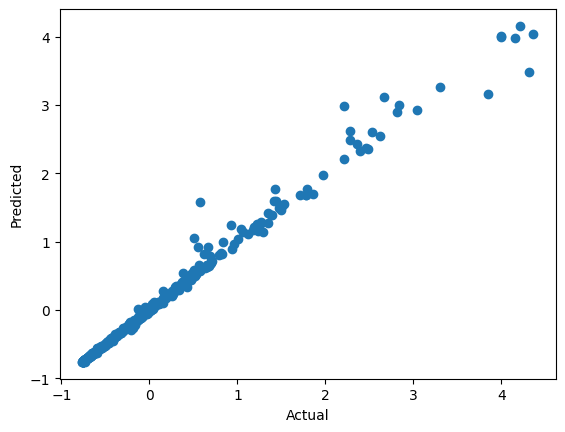

In [21]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

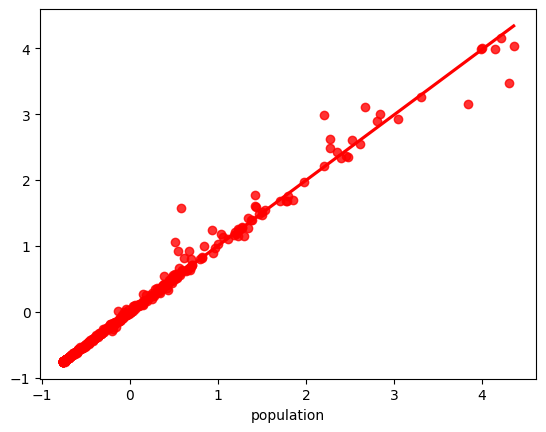

In [22]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [23]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1268,0.963725,0.962781,0.000944
1633,1.433821,1.595300,-0.161479
700,-0.728758,-0.730115,0.001357
2028,2.668710,3.114731,-0.446020
596,0.823686,0.822645,0.001042
...,...,...,...
387,1.002954,1.035961,-0.033007
649,-0.590792,-0.576639,-0.014153
1645,3.996681,4.004090,-0.007409
1318,-0.763194,-0.761307,-0.001888
